In [2]:
from numpy import *
def heunn(x0, f, t0, tf, n):
    """ Calcula la evolución del sistema o ecuación diferencial empleando como método de aproximación
        el método de Heunn, un método Runge Kutta de segundo orden que emplea aproximación por el área del trapecio.
        :parametro x0: Estado inicial, condiciones iniciales
        :parametro f: Función de carga f(t,x)
        :parametro t0: Tiempo inicial
        :parametro tf: Tiempo final
        :parametro n: Cantidad de puntos
    """
    h = (tf - t0) / n
    t = [t0]
    x = [x0]
    for i in range(1, n+1):
        t.append(t[i - 1] + h)
        k1 = f(t[i-1], x[i-1])
        k2 = f(t[i-1] + h, x[i - 1] + h * k1)
        x.append(x[i - 1] + 0.5 * h * (k1 + k2))
    return array(t), array(x)

In [4]:
# Definición de las condiciones del problema
t0 = 0
tf = 1
x0 = array([-2.7, 2.8])
n = 10
f = lambda t, x: array([2 * x[0] + 3 * x[1], 2 * x[0] + x[1]])
t, X = heunn(x0, f, t0, tf, n)
x = [pair[0] for pair in X]
y = [pair[1] for pair in X]

In [6]:
# Computamos los valores reales
xreal = (-69 / 25) * exp(-t) + (3 / 50) * exp(4 * t)
yreal = (69 / 25) * exp(-t) + (1 / 25) * exp(4 * t)

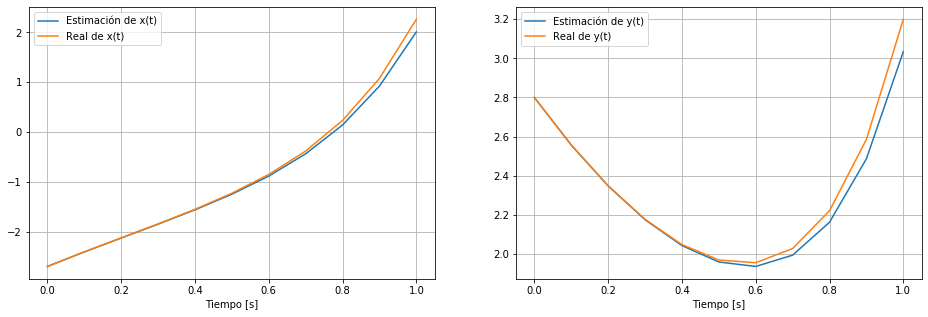

In [8]:
# Ploteamos los resultados comparando tanto x(t) como y(t)
# con los valores reales.
from matplotlib import pyplot
pyplot.rcParams['figure.figsize'] = [16, 5]

fig, (ax1, ax2) = pyplot.subplots(1, 2)

ax1.plot(t, x, label="Estimación de x(t)")
ax1.plot(t, xreal, label="Real de x(t)")
ax1.grid()
ax1.legend()
ax1.set_xlabel("Tiempo [s]")

ax2.plot(t, y, label="Estimación de y(t)")
ax2.plot(t, yreal, label="Real de y(t)")
ax2.grid()
ax2.legend()
ax2.set_xlabel("Tiempo [s]")

pyplot.show()

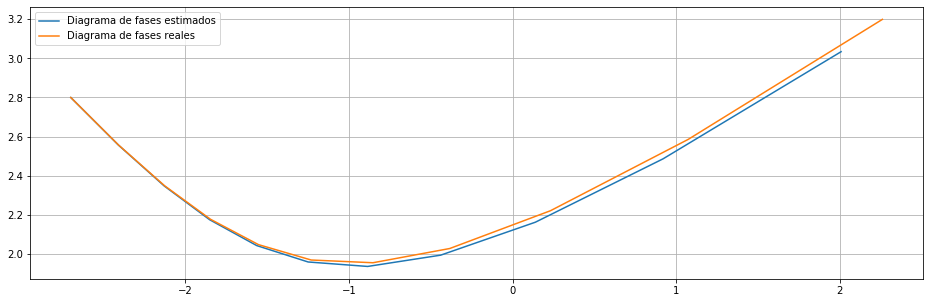

In [9]:
# Ahora graficamos y(t) vs x(t)
fig, ax = pyplot.subplots(1, 1)

ax.plot(x, y, label="Diagrama de fases estimados")
ax.plot(xreal, yreal, label="Diagrama de fases reales")
ax.grid()
ax.legend()

pyplot.show()